In [150]:
# pip install ucimlrepo

In [151]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score, roc_curve,classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


In [153]:
df = pd.concat([X, y], axis=1)
df=pd.DataFrame(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


| Column     | Meaning                                              | Type        | Values / Notes                                                                           |
| ---------- | ---------------------------------------------------- | ----------- | ---------------------------------------------------------------------------------------- |
| `age`      | Age of the patient                                   | Numeric     | Years                                                                                    |
| `sex`      | Sex of the patient                                   | Categorical | 1 = male, 0 = female                                                                     |
| `cp`       | Chest pain type                                      | Categorical | 1 = typical angina<br>2 = atypical angina<br>3 = non-anginal pain<br>4 = asymptomatic    |
| `trestbps` | Resting blood pressure (in mm Hg)                    | Numeric     | Measured when patient was admitted                                                       |
| `chol`     | Serum cholesterol in mg/dl                           | Numeric     | -                                                                                        |
| `fbs`      | Fasting blood sugar > 120 mg/dl                      | Binary      | 1 = true, 0 = false                                                                      |
| `restecg`  | Resting electrocardiographic results                 | Categorical | 0 = normal<br>1 = ST-T abnormality<br>2 = probable/definite left ventricular hypertrophy |
| `thalach`  | Maximum heart rate achieved                          | Numeric     | -                                                                                        |
| `exang`    | Exercise-induced angina                              | Binary      | 1 = yes, 0 = no                                                                          |
| `oldpeak`  | ST depression induced by exercise relative to rest   | Numeric     | -                                                                                        |
| `slope`    | Slope of the peak exercise ST segment                | Categorical | 1 = upsloping<br>2 = flat<br>3 = downsloping                                             |
| `ca`       | Number of major vessels (0–3) colored by fluoroscopy | Numeric     | 0 to 3 (may have some missing coded as ? or float)                                       |
| `thal`     | Thalassemia (blood disorder)                         | Categorical | 3 = normal<br>6 = fixed defect<br>7 = reversible defect                                  |
| `num`      | Diagnosis of heart disease (target)                  | Ordinal     | 0 = no disease<br>1–4 = presence of disease                                              |


# **Data Preprocessing**

In [154]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [155]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [156]:
df.shape

(303, 14)

In [157]:
df.dropna(inplace=True)

In [158]:
df.duplicated().sum()

np.int64(0)

In [159]:
df.num.unique()

array([0, 2, 1, 3, 4])

In [160]:
X=df.drop('num',axis=1).copy()
y=df['num'].copy()


In [161]:
y_not_zero_index=y>0
y[y_not_zero_index]=1
y.unique()

array([0, 1])

In [162]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [163]:
X=pd.get_dummies(X,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [164]:
X= X.astype(int)

In [165]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
298,45,110,264,132,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68,144,193,141,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57,130,131,115,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


# **BuIld A Preliminary Classification Tree**

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42) #default test_size = 0.25
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
decsionTree=DecisionTreeClassifier(random_state=42) #criterion='gini' (for splitting) Gini=1−∑pi^2  , max_depth=None (tree can grow until all leaves are pure)
decsionTree.fit(X_train_scaled,y_train)


DecisionTreeClassifier(random_state=42)

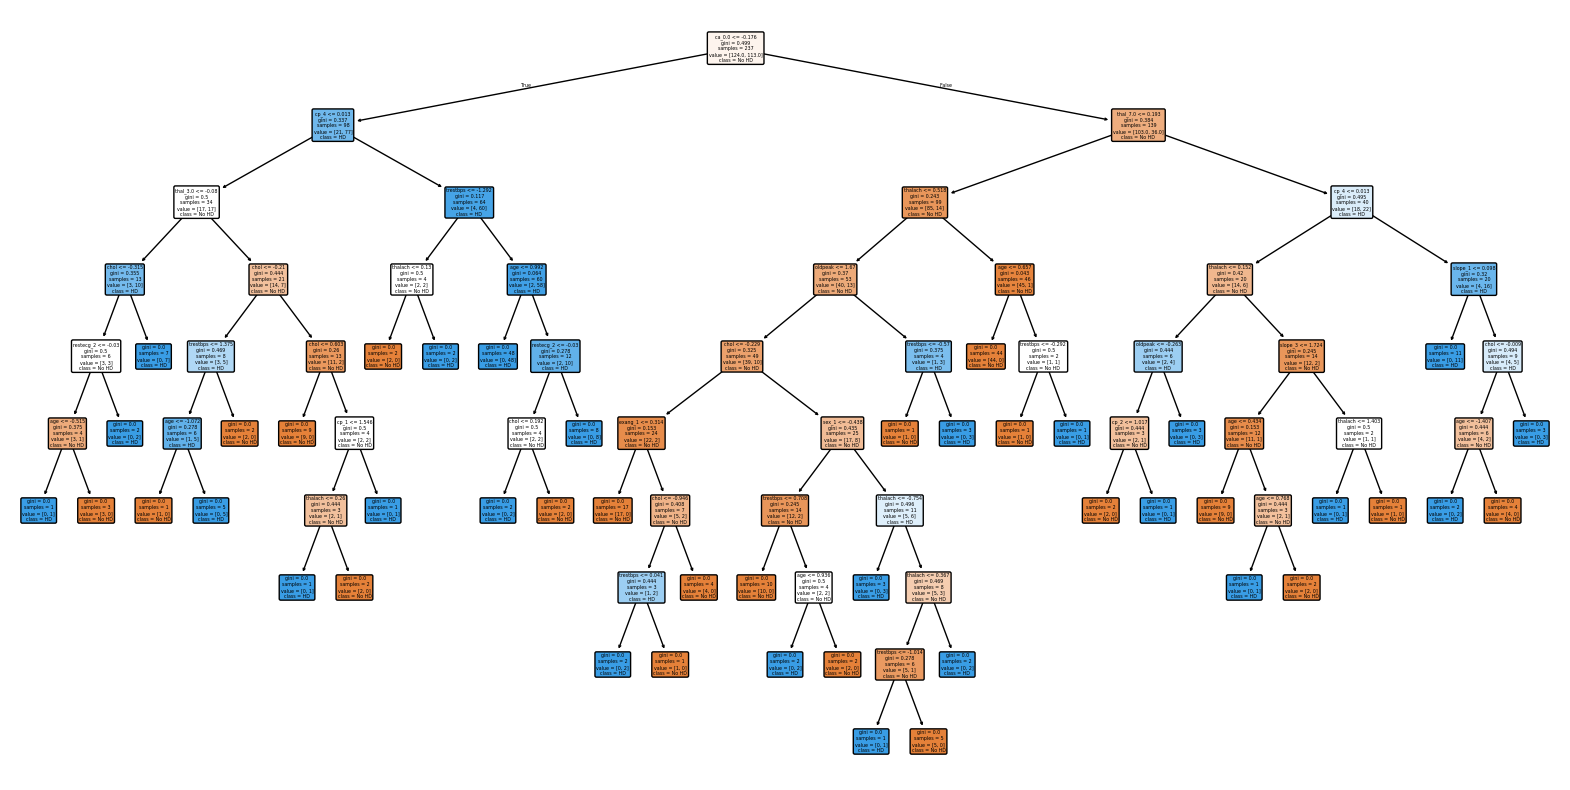

In [168]:
plt.figure(figsize=(20,10))
plot_tree(decsionTree,filled=True,rounded=True,feature_names=X.columns,class_names=['No HD','HD'])
plt.show()

# filled=True : 1-Fills each node in the tree with a color based on the predicted class and impurity.
#2- The darker the color, the purer the node (i.e., more samples of one class).
#3- Helps you visually distinguish between majority classes in different regions of the tree.

*From this tree model may exposed to overfitting*

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


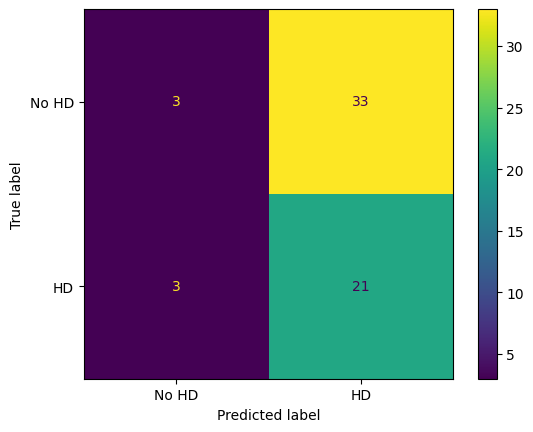

In [169]:
ConfusionMatrixDisplay(confusion_matrix(y_test,decsionTree.predict(X_test)),display_labels=['No HD','HD']).plot()

In [170]:
accuracy_score(y_test,decsionTree.predict(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.4

# **Cost Complexity Pruning**

Rα=(T)=R(T)+α⋅∣T∣

R(T)-->gini rule

In [171]:
path=decsionTree.cost_complexity_pruning_path(X_train_scaled,y_train)
alpha=path.ccp_alphas[:-1] # exclude last alpha that prunes everything
clf_dts=[] #put decision trees into
for α in alpha:
  dt=DecisionTreeClassifier(random_state=0,ccp_alpha=α)
  dt.fit(X_train_scaled,y_train)
  clf_dts.append(dt)


In [172]:
clf_dts

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.003616636528028934),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0041276829939460614),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.004219409282700422),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005157055789967183),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005438349742147208),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005625879043600563),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005842259006815969),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.006329113924050633),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.006329113924

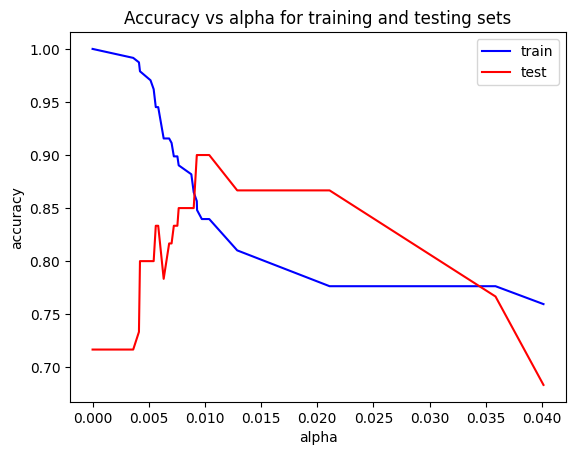

In [173]:
train_score=[dt.score(X_train_scaled,y_train) for dt in clf_dts]
test_score=[dt.score(X_test_scaled,y_test) for dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(alpha,train_score,label='train',color='blue')
ax.plot(alpha,test_score,label='test',color='red')
ax.legend()
plt.show()


<Axes: xlabel='tree'>

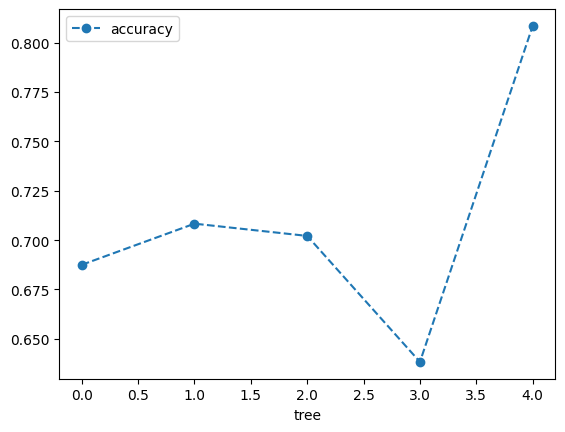

In [174]:
best_alpha = 0.01
final_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
score=cross_val_score(final_model,X_train_scaled,y_train,cv=5)
data=pd.DataFrame(data={'tree':range(5),'accuracy':score})
data.plot(x='tree',y='accuracy',marker='o',linestyle='--')

The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the dataset. So, instead of picking a single Training dataset and single Testing dataset, let's perform cross validation to find the optimal value.

Best alpha: 0.02110, Cross-validated accuracy: 0.7216


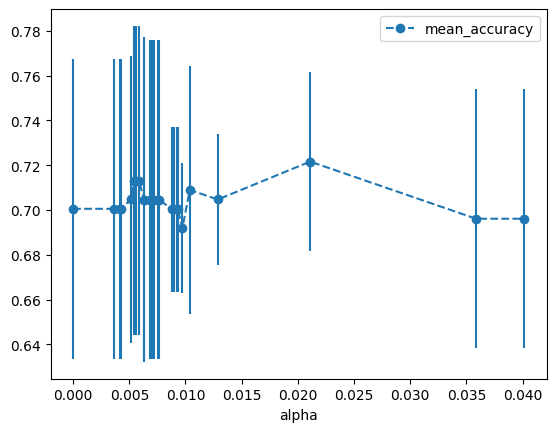

In [175]:
# create an array to store the results of each fold during cross validation
alpha_loop_values = []

# For each candidate value for alpha, we will run 5-fold cross validation.
# Then we will store the mean and standard deviation of the scores (the accuracy) for each call
# to cross_val_score in alpha_loop_values...
for ccp_alpha in alpha:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train_scaled, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Now we can draw a graph of the means and standard deviations of the scores
# for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')
# Step 3: Find the best alpha (with highest mean cross-validated accuracy)
best_index = alpha_results['mean_accuracy'].idxmax()
best_alpha = alpha_results.loc[best_index, 'alpha']
best_accuracy = alpha_results.loc[best_index, 'mean_accuracy']
print(f"Best alpha: {best_alpha:.5f}, Cross-validated accuracy: {best_accuracy:.4f}")


In [176]:
final_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train_scaled, y_train)
y_predict=final_model.predict(X_test_scaled)
test_accuracy = final_model.score(X_test_scaled, y_test)
print(f"Test Accuracy with best alpha = {best_alpha}: {test_accuracy:.4f}")
print(classification_report(y_test,y_predict))


Test Accuracy with best alpha = 0.021097046413502116: 0.8667
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



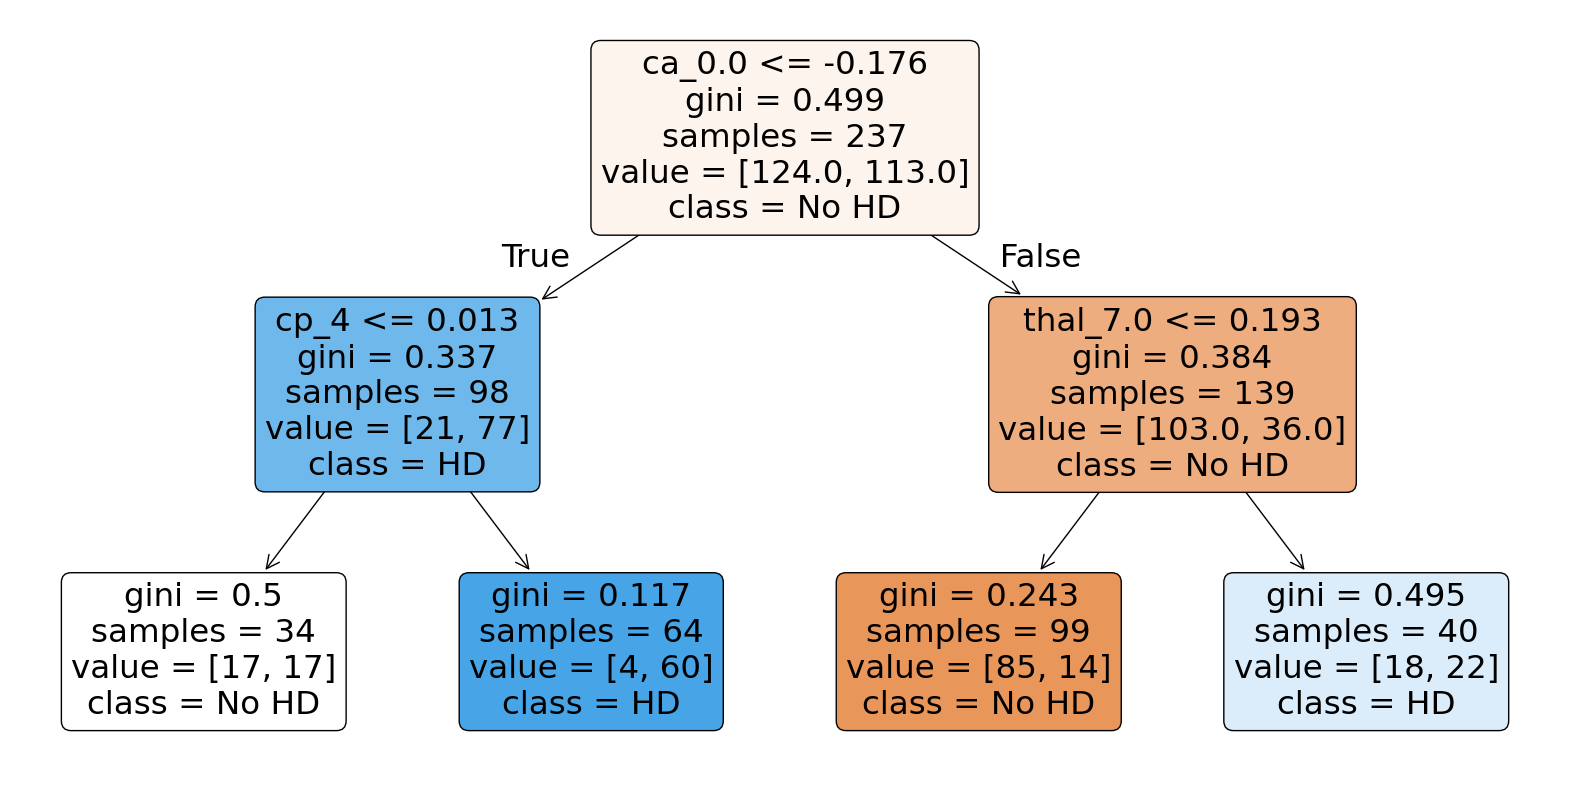

In [177]:
plt.figure(figsize=(20,10))
plot_tree(final_model,filled=True,rounded=True,feature_names=X.columns,class_names=['No HD','HD'])
plt.show()



# **Logistic Regression**

In [178]:
logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [179]:
y_pred=logistic_model.predict(X_test_scaled)
acc=accuracy_score(y_test,y_pred)
print(f"Logistic Regression Accuracy: {acc*100}%")
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy: 81.66666666666667%
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.74      0.83      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



In [180]:
np.bincount(y_train) #to see data balanced or not

array([124, 113])

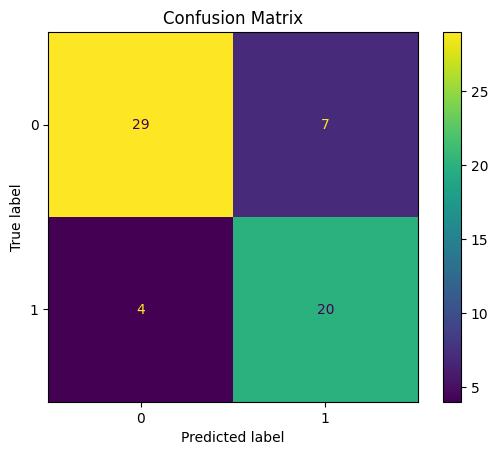

In [181]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [182]:
svm_model=SVC(kernel='rbf',random_state=42)
svm_model.fit(X_train_scaled,y_train)
ys_pred=svm_model.predict(X_test_scaled)
acc=accuracy_score(y_test,ys_pred)
print(f"SVM Accuracy: {acc*100}%")
print(classification_report(y_test,ys_pred))


SVM Accuracy: 88.33333333333333%
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



# **Random Forest**

| Feature                      | Description                                             |
| ---------------------------- | ------------------------------------------------------- |
| 🎲 Randomness                | Reduces overfitting compared to a single decision tree. |
| 🧠 Ensemble Learning         | Many weak models combine to form a strong model.        |
| 🔍 Feature Importance        | Helps in identifying which features matter the most.    |
| 🔄 Works with Missing Values | Can work well after simple imputation.                  |


In [195]:
random_model=RandomForestClassifier(random_state=42,n_estimators= 30)
random_model.fit(X_train_scaled,y_train)
yr=random_model.predict(X_test_scaled)
acc=accuracy_score(y_test,yr)
print(f"Random Forest Accuracy: {acc*100}%")
print(classification_report(y_test,yr))

Random Forest Accuracy: 86.66666666666667%
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60



In [198]:
cm=confusion_matrix(y_test,yr)
cm

array([[34,  2],
       [ 6, 18]])

Text(50.722222222222214, 0.5, 'Truth')

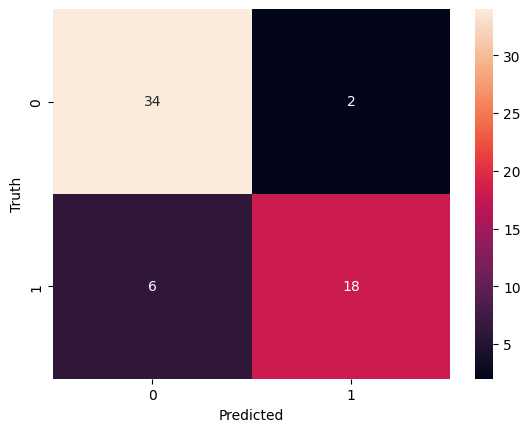

In [201]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:

importances = random_model.feature_importances_
features = X_scaled.columns
plt.barh(features, importances)
plt.title("Feature Importances")
plt.show()
